# Part 1
## Step 1 -  Scraping competitor's data
### (a) and (b) - Code and output of code

In [1]:
import requests
from bs4 import BeautifulSoup
response = requests.get("https://cmsc320.github.io/files/top-50-solar-flares.html")
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="fontawesome-i2svg-active fontawesome-i2svg-complete" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en

In [2]:
import pandas as pd
table = soup.find("table").prettify()
df = pd.read_html(table)[0]
df = df.rename(columns = {"Unnamed: 0": "Rank", "Unnamed: 1": "Classification", "Unnamed: 2" : "Date", "Unnamed: 7":"Movie"})
df.head()

,Rank,Classification,Date,Region,Start,Maximum,End,Movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive


### (c) - Short prose description of how my code works
My code carries out the following steps:
<ul>
    <li> First, it uses the requests module to do an HTTP get request on the url of the SpaceWeatherLive data.</li>
    <li>It then displays the page's content by passing in the text attribute of the get response into a BeautifulSoup instance and calling prettify().</li>
    <li> Finally, it gets the string of the table element of the html file using find() and prettify() then passes it into the  .read_html() function of the pandas library to make a DataFrame out of it.</li>
</ul>

## Step 2 - Tidy the top 50 solar flare data
### (a) and (b) - Code and output of code

In [3]:
df = df.drop(columns=["Movie"]) # drop last column 

In [4]:
df["Date"] = pd.to_datetime(df["Date"]) #converts the "Date" into datetime column
#converts "Start", "Max", and "End" columns into timedelta first then datetime by adding to "Date" column.
df["Start"] = df["Date"] + pd.to_timedelta(df["Start"] + ":00") 
df["Maximum"] = df["Date"] + pd.to_timedelta(df["Maximum"] + ":00")
df["End"] = df["Date"] + pd.to_timedelta(df["End"] + ":00")
df = df.drop(columns=["Date"]) # don't need Date column anymore

In [5]:
from numpy import NaN
df["Region"] = df["Region"].replace("-", NaN) # replace any region set as - to the missing data value, NaN
df

,Rank,Classification,Region,Start,Maximum,End
0,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


### (c) - Short description of how my code works
My code carries out the following steps:
<ul>
    <li> First, it drops the last column as it's irrelevant.</li>
    <li>It then converts the "Date", "Start", "Maximum", and "End" columns into datetime columns. The time columns, specifically, are each converted into datetime columns by first converting them into timedelta columns then adding onto them the "Date" column (which ensures that they are datetime columns).</li>
    <li> Finally, it replaces any region set as - to the missing data value, NaN</li>
</ul>

## Step 3 - Scrape NASA data

In [6]:
response = requests.get("https://cmsc320.github.io/files/waves_type2.html")
soup = BeautifulSoup(response.text, 'html.parser')
nasa_df = pd.DataFrame([l.split()[:15] for l in soup.find("pre").text.split("\n")[12:-2]], columns = ["Start Date", "Start Time", "End Date", "End Time", "Start Freq", "End Freq", "Loc", "Region", "Imp", "CME Date", "CME Time", "CPA", "CME width", "CME speed", "Plot"])
nasa_df

,Start Date,Start Time,End Date,End Time,Start Freq,End Freq,Loc,Region,Imp,CME Date,CME Time,CPA,CME width,CME speed,Plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418,PHTX
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571,PHTX
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163,PHTX
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,PHTX


### (c) - Short prose description of how my code works
My code carries out the following steps:
<ol>
    <li> First, it uses the requests module to do an HTTP get request on the url of the NASA data.</li>
    <li>It then gets the text attribute of the get response into a BeautifulSoup instance.</li>
    <li> Then, a couple of things are done in one line of code: </li>
    <ul>
        <li>Using the text attribute passed to it, the soup instance calls find("pre") to get the pre element where the table is found.</li>
        <li> The text attribute of the pre tag is then used to extract only the text contained in the pre element.</li>
        <li> To separate each row of data, each line is separated using split("\n") (excluding the first 12 lines of text that aren't part of the table).</li>
         <li>Using list comprehension, each row of data is passed throug by iterating through each line, getting each entry for each column in that row using split() (the [:15] is there to get only up to the 15th column since there's an extra column of notes in the website)</li>
        <li> Finally, this list of data is used to create a DataFrame </li>
    </ul>
    
</ol>

## Step 4: Tidy the NASA the table 

In [7]:
# look through all unique vals to see what should be regarded as missing
for column in nasa_df.columns: print(column, ":\n", nasa_df[column].unique())

Start Date :
 ['1997/04/01' '1997/04/07' '1997/05/12' '1997/05/21' '1997/09/23'
 '1997/11/03' '1997/11/04' '1997/11/06' '1997/11/27' '1997/12/12'
 '1998/01/25' '1998/03/29' '1998/04/20' '1998/04/23' '1998/04/24'
 '1998/04/27' '1998/04/29' '1998/05/02' '1998/05/06' '1998/05/09'
 '1998/05/11' '1998/05/19' '1998/05/27' '1998/06/11' '1998/06/16'
 '1998/06/20' '1998/06/22' '1998/11/02' '1998/11/05' '1998/11/06'
 '1998/11/07' '1998/11/08' '1998/12/18' '1999/04/24' '1999/05/03'
 '1999/05/27' '1999/06/01' '1999/06/04' '1999/06/11' '1999/06/22'
 '1999/06/23' '1999/06/28' '1999/06/29' '1999/07/05' '1999/08/28'
 '1999/09/03' '1999/09/10' '1999/10/14' '1999/10/17' '1999/11/16'
 '2000/01/18' '2000/01/28' '2000/02/05' '2000/02/08' '2000/02/10'
 '2000/02/12' '2000/02/17' '2000/02/18' '2000/03/02' '2000/03/07'
 '2000/03/27' '2000/04/04' '2000/04/09' '2000/04/18' '2000/05/04'
 '2000/05/05' '2000/05/07' '2000/05/12' '2000/05/15' '2000/06/02'
 '2000/06/06' '2000/06/10' '2000/06/15' '2000/06/17' '2000/06/

In [8]:
# replace all possible missing vals
nasa_df = nasa_df.replace("BACK", NaN)
nasa_df = nasa_df.replace("Back?", NaN)
nasa_df = nasa_df.replace("Back", NaN)
nasa_df["Imp"] = nasa_df["Imp"].replace("FILA", NaN)
nasa_df = nasa_df.replace("------", NaN)
nasa_df = nasa_df.replace("-----", NaN)
nasa_df = nasa_df.replace("----", NaN)
nasa_df = nasa_df.replace("---", NaN)
nasa_df = nasa_df.replace("????", NaN)
nasa_df = nasa_df.replace("--/--", NaN)
nasa_df = nasa_df.replace("--:--", NaN)

In [9]:
# check if the missing vals are dealt with
for column in nasa_df.columns: print(column, ":\n", nasa_df[column].unique())

Start Date :
 ['1997/04/01' '1997/04/07' '1997/05/12' '1997/05/21' '1997/09/23'
 '1997/11/03' '1997/11/04' '1997/11/06' '1997/11/27' '1997/12/12'
 '1998/01/25' '1998/03/29' '1998/04/20' '1998/04/23' '1998/04/24'
 '1998/04/27' '1998/04/29' '1998/05/02' '1998/05/06' '1998/05/09'
 '1998/05/11' '1998/05/19' '1998/05/27' '1998/06/11' '1998/06/16'
 '1998/06/20' '1998/06/22' '1998/11/02' '1998/11/05' '1998/11/06'
 '1998/11/07' '1998/11/08' '1998/12/18' '1999/04/24' '1999/05/03'
 '1999/05/27' '1999/06/01' '1999/06/04' '1999/06/11' '1999/06/22'
 '1999/06/23' '1999/06/28' '1999/06/29' '1999/07/05' '1999/08/28'
 '1999/09/03' '1999/09/10' '1999/10/14' '1999/10/17' '1999/11/16'
 '2000/01/18' '2000/01/28' '2000/02/05' '2000/02/08' '2000/02/10'
 '2000/02/12' '2000/02/17' '2000/02/18' '2000/03/02' '2000/03/07'
 '2000/03/27' '2000/04/04' '2000/04/09' '2000/04/18' '2000/05/04'
 '2000/05/05' '2000/05/07' '2000/05/12' '2000/05/15' '2000/06/02'
 '2000/06/06' '2000/06/10' '2000/06/15' '2000/06/17' '2000/06/

In [10]:
nasa_df["Lower Bound?"] = nasa_df["CME width"].apply(lambda e : isinstance(e, str) and ">" in e)
nasa_df["CME width"] = nasa_df["CME width"].apply(lambda w : int(w.replace(">","").replace("h","")) if isinstance(w, str) and w.replace(">","").replace("h","").isdigit() else w)
nasa_df["CME speed"] = nasa_df["CME speed"].apply(lambda w : int(w) if isinstance(w, str) and w.isdigit() else NaN)

In [11]:
nasa_df["CME width"].dtype

dtype('float64')

In [12]:
# makes a boolean column of whether the CPA is marked "Halo" 
nasa_df["Halo?"] = nasa_df["CPA"] == "Halo" 
# replaces Halo entries with NaN.
nasa_df["CPA"] = nasa_df["CPA"].replace("Halo", NaN)

In [13]:
# convert "Region" column into integer vals
nasa_df["Region"] = nasa_df["Region"].apply(lambda w : int(w) if isinstance(w, str) and w.isdigit() else NaN)
nasa_df["Region"]

0       8026.0
1       8027.0
2       8038.0
3       8040.0
4       8088.0
        ...   
513    12673.0
514    12673.0
515        NaN
516    12680.0
517        NaN
Name: Region, Length: 518, dtype: float64

In [14]:
# convert to datetime columns
nasa_df["Start Date"] = pd.to_datetime(nasa_df["Start Date"])
nasa_df["End Date"] = pd.to_datetime(nasa_df["Start Date"].apply(lambda d: str(d.year) + '/') + nasa_df["End Date"]) # need to add in year for "End Date"
#converts "Start Date", "End Date", and "CME " columns into timedelta first then datetime by adding to "Date" column.
nasa_df["CME Time"] = pd.to_datetime(nasa_df["Start Date"].apply(lambda d: str(d.year) + '/') + nasa_df["CME Date"]) + pd.to_timedelta(nasa_df["CME Time"] + ":00")
nasa_df["Start Time"] = pd.to_timedelta(nasa_df["Start Time"] + ":00") + nasa_df["Start Date"]
nasa_df["End Time"] = pd.to_timedelta(nasa_df["End Time"] + ":00") + nasa_df["End Date"]

In [15]:
nasa_df = nasa_df.drop(columns = ["Start Date", "End Date", "CME Date"])

In [16]:
nasa_df

,Start Time,End Time,Start Freq,End Freq,Loc,Region,Imp,CME Time,CPA,CME width,CME speed,Plot,Lower Bound?,Halo?
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026.0,M1.3,1997-04-01 15:18:00,74,79.0,312.0,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027.0,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,PHTX,False,True
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038.0,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,PHTX,False,True
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040.0,M1.3,1997-05-21 21:00:00,263,165.0,296.0,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088.0,C1.4,1997-09-23 22:02:00,133,155.0,712.0,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673.0,M5.5,2017-09-04 20:12:00,NaN,360.0,1418.0,PHTX,False,True
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673.0,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,PHTX,False,True
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360.0,3163.0,PHTX,False,True
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680.0,C3.0,2017-09-12 08:03:00,124,96.0,252.0,PHTX,False,False


### (c) - Short prose description of how my code works
My code carries out the following steps:
<ol>
    <li> First, it replaces all kinds of missing entries such as  "BACK" and "----" with NaN.</li>
    <li>It then makes a boolean column of whether the CPA is marked "Halo" and replaces Halo entries with NaN.</li>
    <li> Then I converted the start time, end time, and cme time columns to datetime columns in the same manner as I did before.</li>
</ol>

# Part 2
## Question 1

In [17]:
# Top 50 from SpaceWeatherLive
df["Classification"] = df["Classification"].apply(lambda s : s.replace("+",""))
df["Classification Letter"] = df["Classification"].apply(lambda s : s[0])
df["Classification No."] = df["Classification"].apply(lambda s : float(s[1:]))
df = df.drop(columns="Classification")
df.sort_values(by =["Classification Letter","Classification No."], ascending=False).head(50)

,Rank,Region,Start,Maximum,End,Classification Letter,Classification No.
0,1,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,X,28.0
1,2,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,X,20.0
2,3,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,X,17.2
3,4,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,X,17.0
4,5,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,X,14.4
5,6,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,X,10.0
6,7,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,X,9.4
7,8,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,X,9.3
8,9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,X,9.0
9,10,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,X,8.3


In [18]:
# Top 50 from NASA
nasa_df["Classification Letter"] = nasa_df["Imp"].apply(lambda s : s[0] if s is not NaN else s)
nasa_df["Classification No."] = nasa_df["Imp"].apply(lambda s : float(s[1:])  if s is not NaN else s)
nasa_df = nasa_df.drop(columns="Imp")
nasa_df = nasa_df.sort_values(by =["Classification Letter", "Classification No."], ascending=False)
nasa_df.head(50)

,Start Time,End Time,Start Freq,End Freq,Loc,Region,CME Time,CPA,CME width,CME speed,Plot,Lower Bound?,Halo?,Classification Letter,Classification No.
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486.0,2003-11-04 19:54:00,NaN,360.0,2657.0,PHTX,False,True,X,28.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393.0,2001-04-02 22:06:00,261,244.0,2505.0,PHTX,False,False,X,20.0
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486.0,2003-10-28 11:30:00,NaN,360.0,2459.0,PHTX,False,True,X,17.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415.0,2001-04-15 14:06:00,245,167.0,1199.0,PHTX,False,False,X,14.0
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486.0,2003-10-29 20:54:00,NaN,360.0,2029.0,PHTX,False,True,X,10.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100.0,1997-11-06 12:10:00,NaN,360.0,1556.0,PHTX,False,True,X,9.4
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673.0,2017-09-06 12:24:00,NaN,360.0,1571.0,PHTX,False,True,X,9.3
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930.0,NaT,NaN,NaN,NaN,PHTX,False,False,X,9.0
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486.0,2003-11-02 17:30:00,NaN,360.0,2598.0,PHTX,False,True,X,8.3
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,2017-09-10 16:00:00,NaN,360.0,3163.0,PHTX,False,True,X,8.3


### Question 1 Response
The top 50 of the NASA data when sorted by classification seems to be close to the top 50 of the SpaceWeather Live but some of the rows from the SpaceWeather Live seem to be missing.

## Question 2: Integration

In [19]:
max_fill_df = nasa_df.copy()
max_fill_df.loc[nasa_df["CME Time"].isna(), "CME Time"] = max_fill_df["Start Time"] + (max_fill_df["End Time"] - max_fill_df["Start Time"])/2
max_fill_df = max_fill_df["CME Time"].apply(lambda e: abs(df["Maximum"] - e))

In [20]:
start_end = (nasa_df["Start Time"].apply(lambda e: abs(df["Start"] - e)) + nasa_df["End Time"].apply(lambda e: abs(df["End"] - e))).idxmin().apply(lambda i: nasa_df.iloc[i])
maxy = max_fill_df.idxmin().apply(lambda i : nasa_df.iloc[i])

In [21]:
nasa_df["SWL Rank"] = max_fill_df.idxmin(axis=1) + 1

In [22]:
nasa_df

,Start Time,End Time,Start Freq,End Freq,Loc,Region,CME Time,CPA,CME width,CME speed,Plot,Lower Bound?,Halo?,Classification Letter,Classification No.,SWL Rank
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486.0,2003-11-04 19:54:00,NaN,360.0,2657.0,PHTX,False,True,X,28.0,1
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393.0,2001-04-02 22:06:00,261,244.0,2505.0,PHTX,False,False,X,20.0,2
233,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486.0,2003-10-28 11:30:00,NaN,360.0,2459.0,PHTX,False,True,X,17.0,3
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415.0,2001-04-15 14:06:00,245,167.0,1199.0,PHTX,False,False,X,14.0,5
234,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486.0,2003-10-29 20:54:00,NaN,360.0,2029.0,PHTX,False,True,X,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2016-05-24 17:00:00,2016-05-24 20:50:00,1500,700,NaN,NaN,NaT,NaN,NaN,NaN,PHTX,False,False,NaN,NaN,46
509,2016-08-15 18:21:00,2016-08-15 18:28:00,11000,3400,E90b,NaN,2016-08-15 17:24:00,75,98.0,633.0,PHTX,False,False,NaN,NaN,8
510,2017-04-23 06:00:00,2017-04-23 06:13:00,15000,8300,N16E41,NaN,2017-04-23 06:00:00,85,77.0,955.0,PHTX,False,False,NaN,NaN,8
512,2017-07-23 05:27:00,2017-07-23 06:12:00,4400,900,NaN,NaN,2017-07-23 04:48:00,NaN,360.0,1848.0,PHTX,False,True,NaN,NaN,8


## Question 3 : Analysis 
### (a) Intent
This plot intends to illustrate visually how the spread and average location of the top 50 solar flares differ from the rest of the solar flares as well as how the average CME speed of the top 50 solar flares differ from the rest of the solar flares. 
### (b) Code

In [23]:
nasa_df = nasa_df.reset_index(drop = True).reset_index()

In [24]:
nasa_df.loc[nasa_df["Start Freq"].notna(), "Start Freq"] = nasa_df.loc[nasa_df["Start Freq"].notna(), "Start Freq"].apply(lambda x: int(x)) 
nasa_df.loc[nasa_df["End Freq"].notna(), "End Freq"] = nasa_df.loc[nasa_df["End Freq"].notna(), "End Freq"].apply(lambda x: int(x))
nasa_df.loc[nasa_df["CPA"].notna(), "CPA"] = nasa_df.loc[nasa_df["CPA"].notna(), "CPA"].apply(lambda x: int(x))

Text(0, 0.5, 'Latitude')

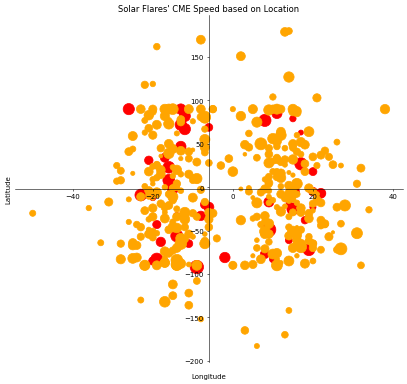

In [25]:
import re
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1,figsize = (10, 9), dpi = 50)

def get_cor(loc_str):
    cors = re.findall("[NSEW]\d*", loc_str)
    x, y = None, None
    for cor in cors:
        if len(cor[1:]) > 1:
            if cor[0] == 'S' or cor[0] == 'N':
                x = int(cor[1:]) * (-1 if cor[0] == 'S' else 1)
            elif cor[0] == 'E' or cor[0] == 'W':
                y = int(cor[1:]) * (-1 if cor[0] == 'W' else 1)
    return [x,y]
axs.set_title("Solar Flares' CME Speed based on Location")
axs.scatter(nasa_df["Loc"].dropna().apply(lambda x: get_cor(x)[0]), nasa_df["Loc"].dropna().apply(lambda x: get_cor(x)[1]), c= nasa_df.loc[nasa_df["Loc"].notna(), "index"].apply(lambda x: "red" if x < 50 else "orange"), s=400*(nasa_df.loc[nasa_df["Loc"].notna(), "CME speed"]/(nasa_df["CME speed"].max())))
axs.spines[['top','right']].set_visible(False)
axs.spines[['left','bottom']].set_position('center')
axs.set_xlabel('Longitude', labelpad = 250)
axs.set_ylabel('Latitude',  labelpad = 250)
# nasa_df["Loc"].apply(lambda x: x[3:4] * (-1 if x[0] == 'w' else 1))

### (c)  Plot description
The plot above plots the longitude and latitude provided by the "Loc" column along the y and x axes respectively for each of the solar flares to indicating the location of the solar flare. The CME speed of each solar flare is represented by the size of its respective point. In addition, the points representing the top 50 solar flares are colored in red to differentiate it from the rest of the other points.
### (d) Plot interpretation
As seen from the plot, although, the average location of the top 50 solar flares compared to the reset of the solar flares doesn't seem much different, the top 50 are closer together than ther rest of the solar flares as they mostly have a latitude between -20 degrees and +20 degrees. This indicates that the spread in location is less for the top 50 solar flares compared to the rest of the solar flares. 

In addition, the plot indicates that the top 50 solar flares are among the solar flares with the highest CME speeds indicating that the average CME speed for the top 50 solar flares is higher than the average CME speed for the rest of the solar flares. This can easily be verified by using mean():

In [26]:
# Average CME speed of top 50 solar flares
nasa_df.loc[nasa_df["index"] < 50, "CME speed"].mean()

1731.625

In [27]:
# Average CME speed of all other solar flares
nasa_df.loc[nasa_df["index"] >= 50, "CME speed"].mean()

1103.017857142857

Moreover, the plot suggests that while there isn't as much of a skew in CME speed for the top 50 solar flares, there seems to be a right skew in the distribution of CME speeds for the rest of the solar flares as some of the solar flares seem to have a CME speed as high as the top 50. This can be verified using a boxplot of the CME speeds for the top 50 and the rest respectively:

(0.0, 3500.0)

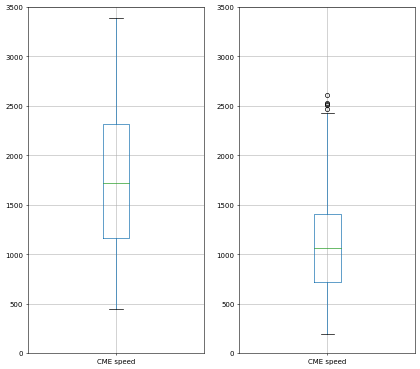

In [28]:
fig, axs = plt.subplots(1, 2,figsize = (10, 9), dpi = 50)
# box plot of top 50
nasa_df[nasa_df["index"] < 50].boxplot(ax = axs[0], column="CME speed")
#box plot of rest 
nasa_df[nasa_df["index"] >= 50].boxplot(ax=axs[1], column="CME speed")
# set axes scale to be same so there's no cheating
axs[0].set_ylim(bottom = 0, top=3500)
axs[1].set_ylim(bottom = 0, top=3500)